In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import plotly.graph_objs as go
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS
plt.style.use('Solarize_Light2')
plt.style.context('grayscale')
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('Different_stores_dataset.csv')
data.head()

,invoice_no,invoice_date,customer_id,gender,age,category,quantity,selling_price_per_unit,cost_price_per_unit,payment_method,region,state,shopping_mall
0,I138884,10/30/2016 9:58,C241288,Female,28,Clothing,5,1500.40,1425.380,Credit Card,South,Kentucky,Kanyon
1,I317333,10/30/2016 9:58,C111565,Male,21,Shoes,3,1800.51,1620.459,Debit Card,South,Kentucky,Viaport Outlet
2,I127801,10/30/2016 9:58,C266599,Male,20,Clothing,1,300.08,295.060,Cash,West,California,Metrocity
3,I173702,10/30/2016 9:58,C988172,Female,66,Shoes,5,3000.85,2900.765,Credit Card,South,Florida,Metropol AVM
4,I337046,10/30/2016 9:59,C189076,Female,53,Books,4,60.60,45.450,Cash,South,Florida,Kanyon


In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   invoice_no              99457 non-null  object 
 1   invoice_date            99457 non-null  object 
 2   customer_id             99457 non-null  object 
 3   gender                  99457 non-null  object 
 4   age                     99457 non-null  int64  
 5   category                99457 non-null  object 
 6   quantity                99457 non-null  int64  
 7   selling_price_per_unit  99457 non-null  float64
 8   cost_price_per_unit     99457 non-null  float64
 9   payment_method          99457 non-null  object 
 10  region                  99457 non-null  object 
 11  state                   99457 non-null  object 
 12  shopping_mall           99457 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 9.9+ MB


In [5]:
data.shape

(99457, 13)

In [6]:
data.duplicated().sum()

np.int64(0)

In [8]:
data.isnull().sum()

invoice_no                0
invoice_date              0
customer_id               0
gender                    0
age                       0
category                  0
quantity                  0
selling_price_per_unit    0
cost_price_per_unit       0
payment_method            0
region                    0
state                     0
shopping_mall             0
dtype: int64

In [13]:
data['invoice_date'] = pd.to_datetime(data['invoice_date'])
data.head()

,invoice_no,invoice_date,customer_id,gender,age,category,quantity,selling_price_per_unit,cost_price_per_unit,payment_method,region,state,shopping_mall
0,I138884,2016-10-30 09:58:00,C241288,Female,28,Clothing,5,1500.40,1425.380,Credit Card,South,Kentucky,Kanyon
1,I317333,2016-10-30 09:58:00,C111565,Male,21,Shoes,3,1800.51,1620.459,Debit Card,South,Kentucky,Viaport Outlet
2,I127801,2016-10-30 09:58:00,C266599,Male,20,Clothing,1,300.08,295.060,Cash,West,California,Metrocity
3,I173702,2016-10-30 09:58:00,C988172,Female,66,Shoes,5,3000.85,2900.765,Credit Card,South,Florida,Metropol AVM
4,I337046,2016-10-30 09:59:00,C189076,Female,53,Books,4,60.60,45.450,Cash,South,Florida,Kanyon


In [15]:
data['day'] = data['invoice_date'].dt.day_name()
data.head(2)

,invoice_no,invoice_date,customer_id,gender,age,category,quantity,selling_price_per_unit,cost_price_per_unit,payment_method,region,state,shopping_mall,day
0,I138884,2016-10-30 09:58:00,C241288,Female,28,Clothing,5,1500.40,1425.380,Credit Card,South,Kentucky,Kanyon,Sunday
1,I317333,2016-10-30 09:58:00,C111565,Male,21,Shoes,3,1800.51,1620.459,Debit Card,South,Kentucky,Viaport Outlet,Sunday


In [17]:
data.drop(columns=['invoice_no'],inplace=True)
data.head(2)

,invoice_date,customer_id,gender,age,category,quantity,selling_price_per_unit,cost_price_per_unit,payment_method,region,state,shopping_mall,day
0,2016-10-30 09:58:00,C241288,Female,28,Clothing,5,1500.40,1425.380,Credit Card,South,Kentucky,Kanyon,Sunday
1,2016-10-30 09:58:00,C111565,Male,21,Shoes,3,1800.51,1620.459,Debit Card,South,Kentucky,Viaport Outlet,Sunday


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   invoice_date            99457 non-null  datetime64[ns]
 1   customer_id             99457 non-null  object        
 2   gender                  99457 non-null  object        
 3   age                     99457 non-null  int64         
 4   category                99457 non-null  object        
 5   quantity                99457 non-null  int64         
 6   selling_price_per_unit  99457 non-null  float64       
 7   cost_price_per_unit     99457 non-null  float64       
 8   payment_method          99457 non-null  object        
 9   region                  99457 non-null  object        
 10  state                   99457 non-null  object        
 11  shopping_mall           99457 non-null  object        
 12  day                     99457 non-null  object

In [20]:
data.describe()

,invoice_date,age,quantity,selling_price_per_unit,cost_price_per_unit
count,99457,99457.000000,99457.000000,99457.000000,99457.000000
mean,2016-11-07 11:20:53.000191232,43.427089,3.004424,689.256321,605.113854
min,2016-10-30 09:58:00,18.000000,1.000000,5.230000,3.661000
25%,2016-11-03 10:39:00,30.000000,2.000000,45.450000,31.815000
50%,2016-11-07 11:21:00,43.000000,3.000000,203.300000,162.640000
75%,2016-11-11 12:02:00,56.000000,4.000000,1200.320000,1080.306000
max,2016-11-15 12:44:00,69.000000,15.000000,5250.000000,4725.000000
std,NaN,14.990054,1.415237,941.184567,858.838256


array([[<Axes: title={'center': 'invoice_date'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'quantity'}>,
        <Axes: title={'center': 'selling_price_per_unit'}>],
       [<Axes: title={'center': 'cost_price_per_unit'}>, <Axes: >]],
      dtype=object)

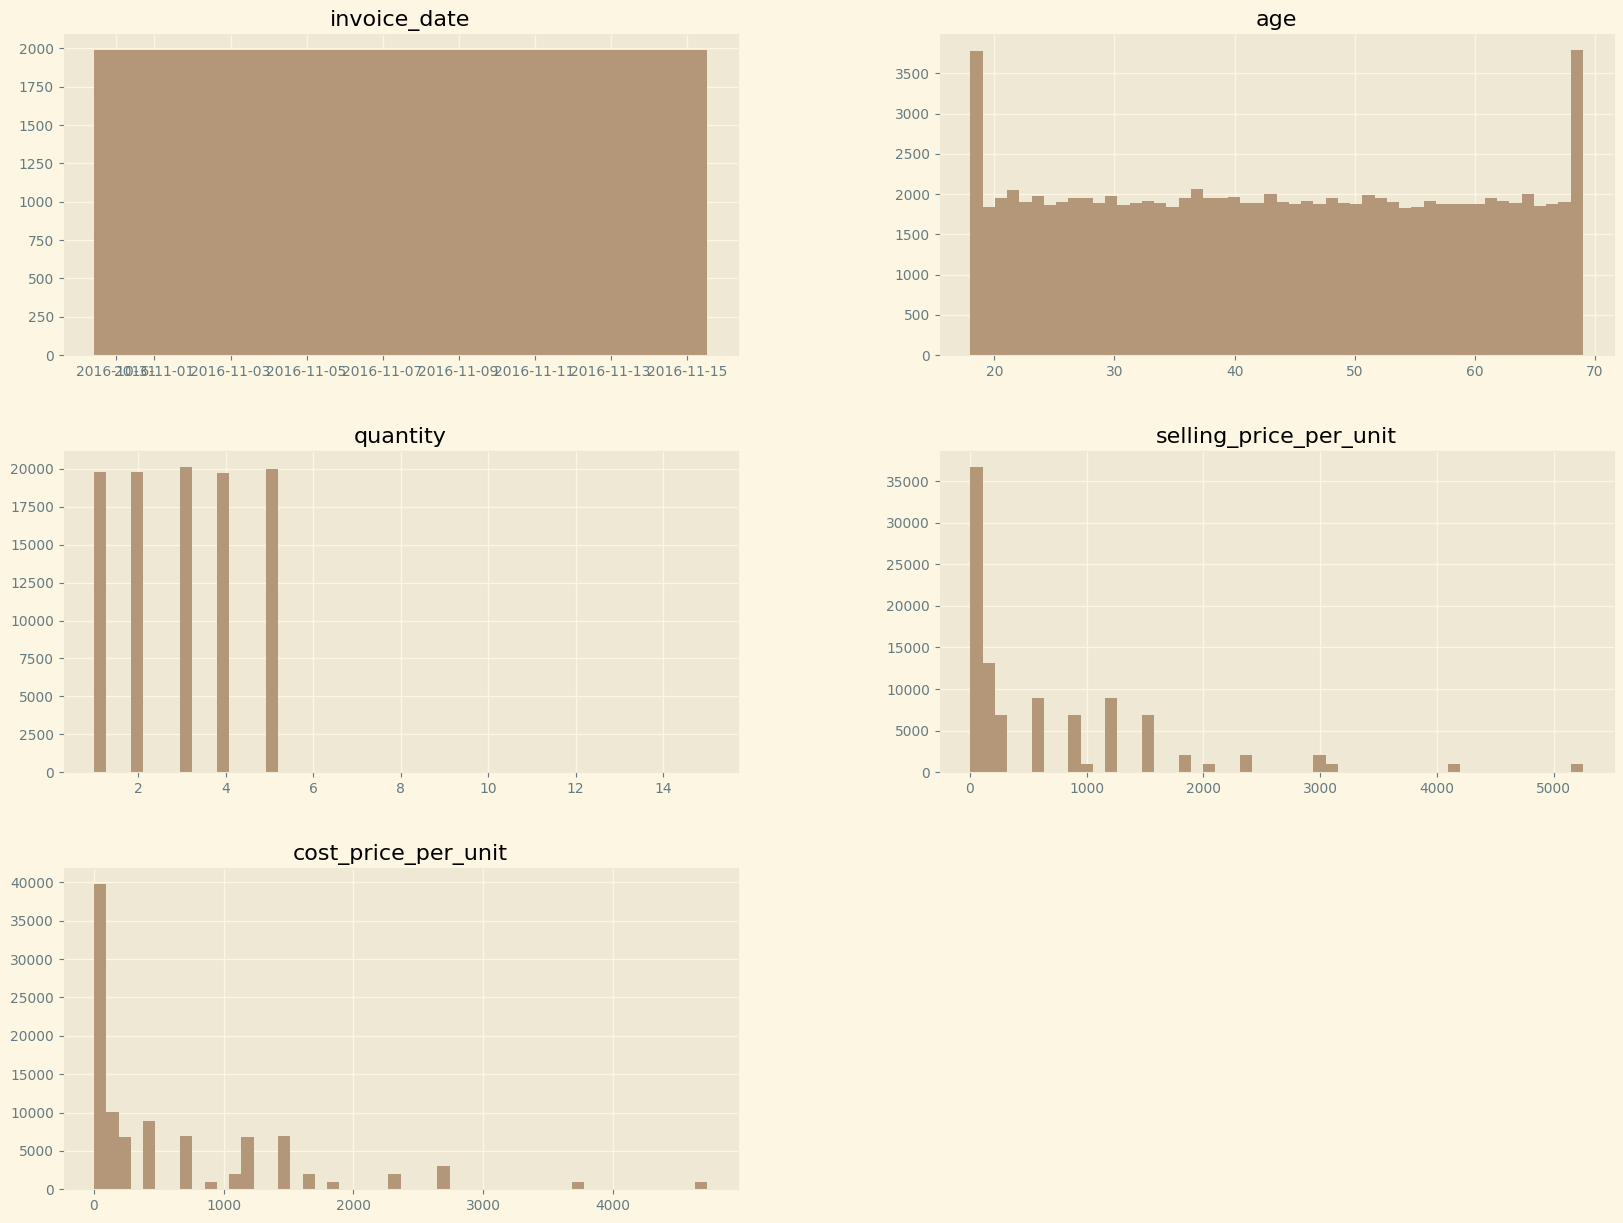

In [60]:
data.hist(bins=50, figsize=(20,15), color = "#B49779")

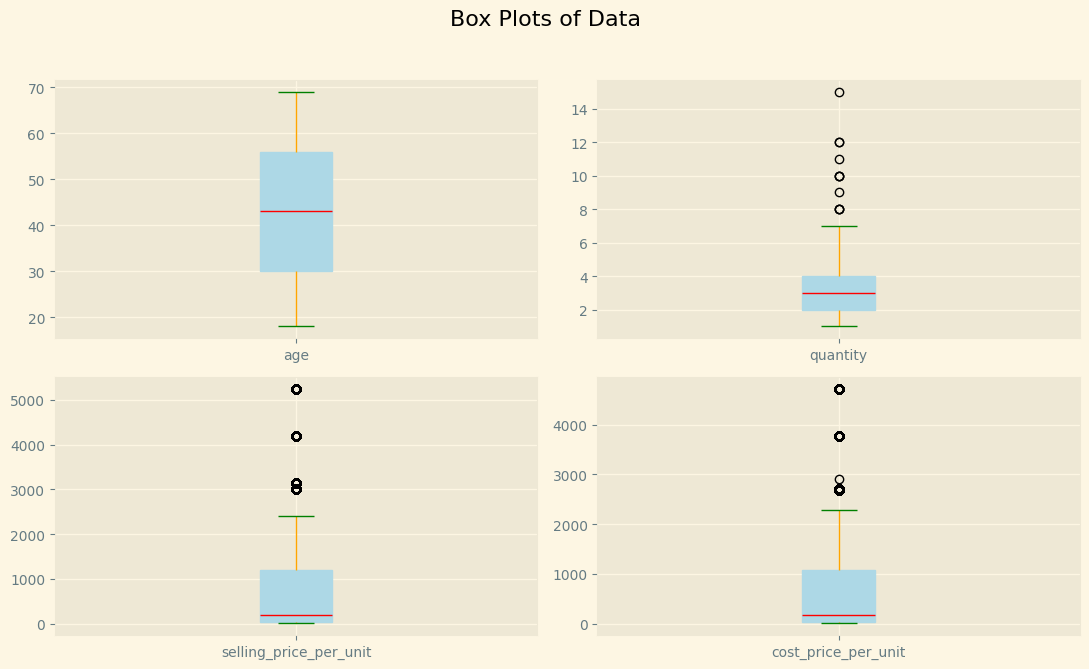

In [134]:
data.plot(kind='box', subplots=True, layout=(2,2), figsize=(11,7), patch_artist=True,
             color=dict(boxes='lightblue', whiskers='orange', medians='red', caps='green'))

plt.suptitle('Box Plots of Data', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the title
plt.show()

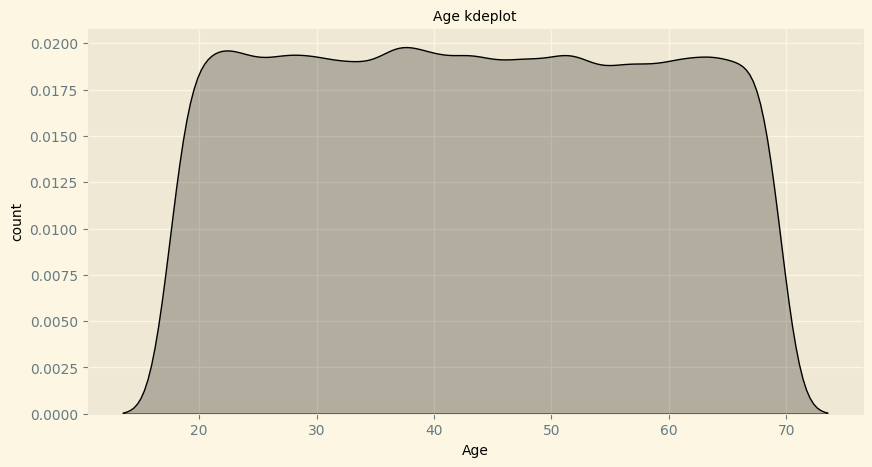

In [142]:
plt.figure(figsize=(10,5))

sns.kdeplot(data=data, x="age",color="black",fill=True)
plt.xlabel("Age", color="black", fontsize=10)
plt.ylabel("count", color="black", fontsize=10)
plt.title("Age kdeplot", color="black",fontsize=10)
plt.show()

In [61]:
data['gender'].value_counts()

gender
Female    59482
Male      39975
Name: count, dtype: int64

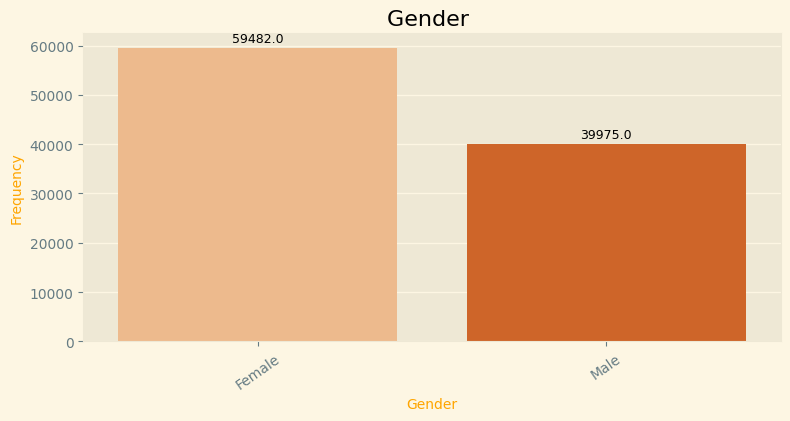

In [62]:
plt.figure(figsize = (9,4))

ax = sns.countplot(data=data, x="gender", palette="Oranges")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=9, color='black', 
                xytext=(0, 2), textcoords='offset points')

plt.xticks(rotation=35)
plt.xlabel("Gender",fontsize=10,color="orange")
plt.ylabel("Frequency",fontsize=10,color="orange")
plt.title("Gender ",color="black")
plt.show()

In [31]:
week_visits = data.groupby('day')['quantity'].sum().sort_values()
week_visits

day
Friday       36957
Saturday     37053
Thursday     37103
Wednesday    37117
Tuesday      46739
Sunday       48298
Monday       55544
Name: quantity, dtype: int64

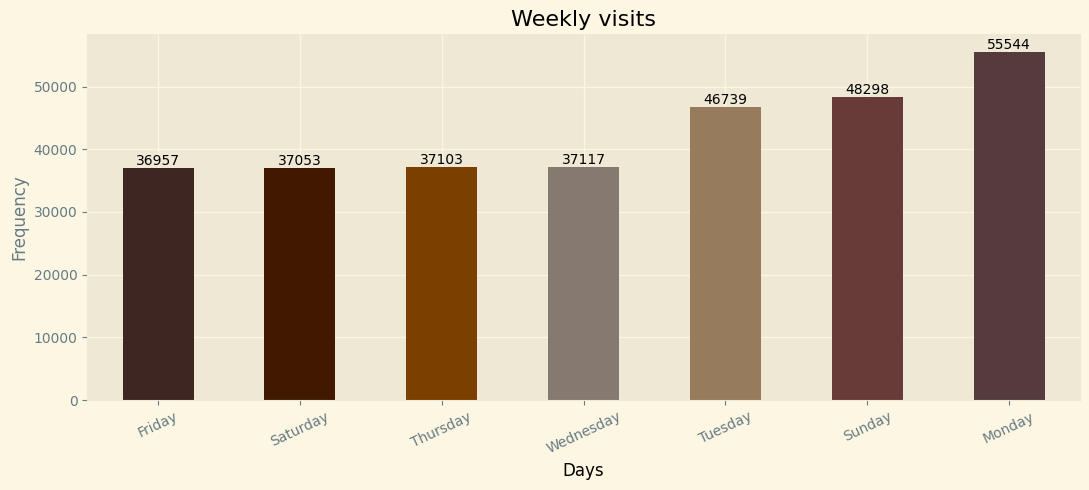

In [36]:
plt.figure(figsize = (11,5))
colors = ['#3E2723', '#411900', '#7B3F00', '#867970', '#967B5D', '#683B39', '#553B3D']

week_visits.plot(kind = 'bar', color = colors)
handles = [plt.Rectangle((0,0),1,1, color = color) for color in colors[:len(week_visits)]]
labels = week_visits.index.tolist()  # Use item names as labels
for i, v in enumerate(week_visits):
     plt.annotate(str(v),xy =(i,v), ha='center',va='bottom')


plt.xticks(rotation = 25)
plt.xlabel('Days', color = 'black')
plt.ylabel('Frequency')
plt.title('Weekly visits')
plt.tight_layout() 

Text(0.5, 1.0, 'Visits during Week')

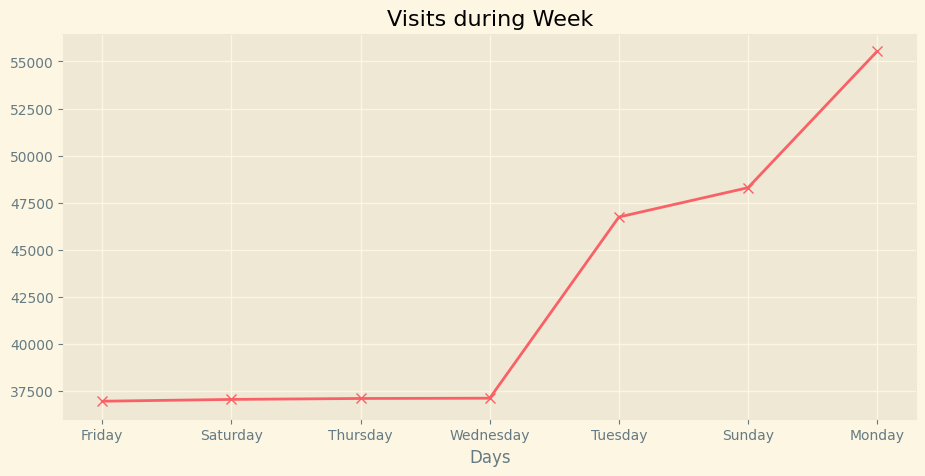

In [126]:
plt.figure(figsize=(11, 5))

week_visits.plot (title = 'Days',marker = 'x',markersize=7, color = '#F96167')
plt.xlabel('Days')
plt.title('Visits during Week')

In [37]:
#Total quantity Sold by Category
purchases = data.groupby('category')['quantity'].sum().sort_values()
purchases

category
Souvenir            14871
Books               14989
Technology          15033
Shoes               30217
Toys                30321
Food & Beverage     44281
Cosmetics           45501
Clothing           103598
Name: quantity, dtype: int64

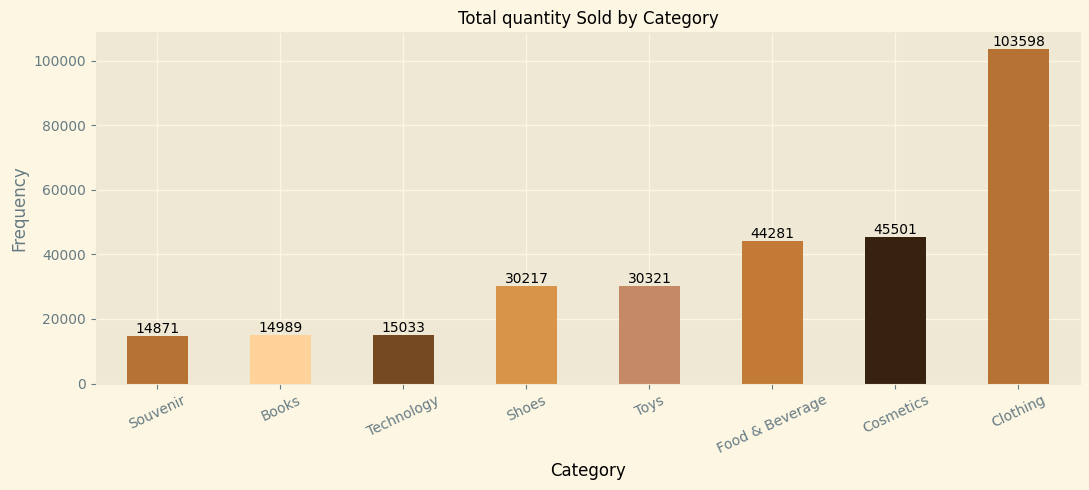

In [38]:
plt.figure(figsize = (11,5))

colors = ['#B67233', '#FFD29A', '#754A21', '#D89549', '#C68965', '#C27A36', '#36220F']
purchases.plot(kind = 'bar', color = colors)
handles = [plt.Rectangle((0,0),1,1, color = color) for color in colors[:len(purchases)]]
labels = purchases.index.tolist()  # Use item names as labels
for i, v in enumerate(purchases):
     plt.annotate(str(v),xy =(i,v), ha='center',va='bottom')


plt.xticks(rotation = 25)
plt.xlabel('Category', color = 'black')
plt.ylabel('Frequency')
plt.title('Total quantity Sold by Category',color = 'black', fontsize=12)
plt.tight_layout() 

In [66]:
#Total selling per Category
selling_items = data.groupby('category')['selling_price_per_unit'].sum().sort_values().round()
selling_items

category
Souvenir             174437.0
Books                226977.0
Food & Beverage      231569.0
Toys                1086705.0
Cosmetics           1848607.0
Technology         15772050.0
Shoes              18135337.0
Clothing           31075685.0
Name: selling_price_per_unit, dtype: float64

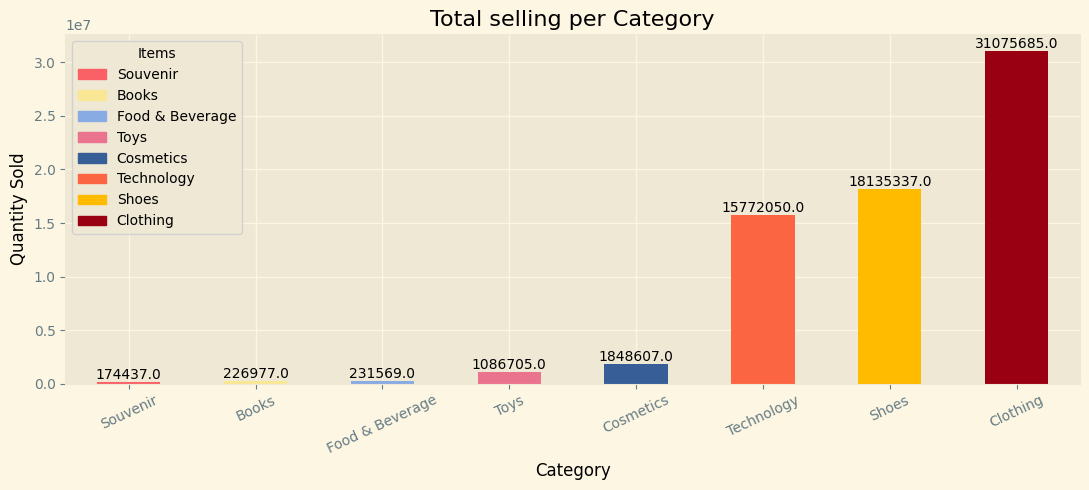

In [69]:
#Total selling per Category
plt.figure(figsize = (11,5))
colors = ['#F96167', '#F9E795', '#89ABE3', '#EA738D', 
          '#375E97', '#FB6542', '#FFBB00', '#990011', 
          '#FCF6F5', '#A1BE95']
selling_items.plot(kind = 'bar', color = colors)
handles = [plt.Rectangle((0,0),1,1, color = color) for color in colors[:len(selling_items)]]
labels = selling_items.index.tolist()  # Use item names as labels
for i, v in enumerate(selling_items):
     plt.annotate(str(v),xy =(i,v), ha='center',va='bottom')

plt.legend(handles,labels, title='Items')
plt.xticks(rotation = 25)
plt.xlabel('Category',  color = 'black')
plt.ylabel('Quantity Sold', color = 'black')
plt.title('Total selling per Category', color = 'black')
plt.tight_layout() 

In [71]:
payment_method = data['payment_method'].value_counts()

payment_method
Cash           44447
Credit Card    34931
Debit Card     20079
Name: count, dtype: int64

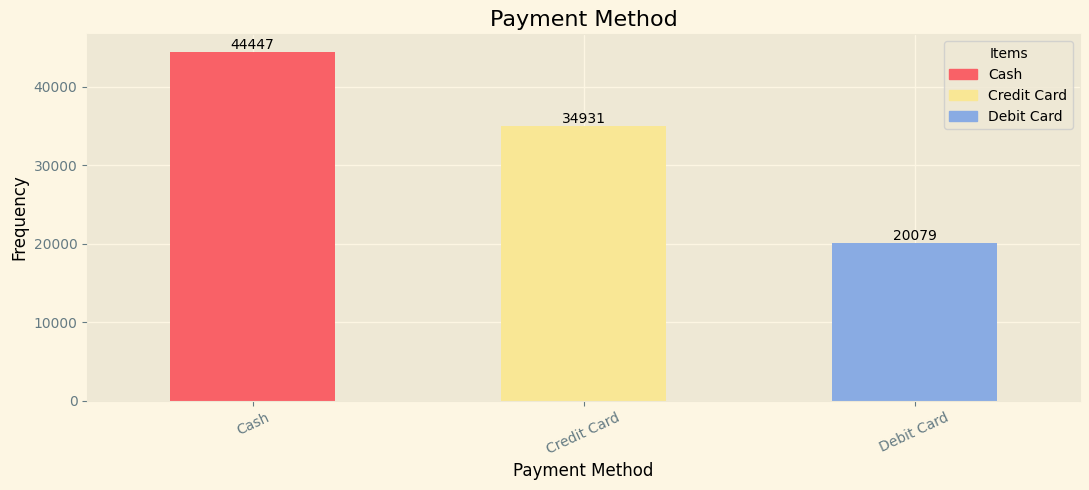

In [74]:
#Payment Method
plt.figure(figsize = (11,5))
colors = ['#F96167', '#F9E795', '#89ABE3']
payment_method.plot(kind = 'bar', color = colors)
handles = [plt.Rectangle((0,0),1,1, color = color) for color in colors[:len(payment_method)]]
labels =payment_method.index.tolist()  # Use item names as labels
for i, v in enumerate(payment_method):
     plt.annotate(str(v),xy =(i,v), ha='center',va='bottom')

plt.legend(handles,labels, title='Items')
plt.xticks(rotation = 25)
plt.xlabel('Payment Method',  color = 'black')
plt.ylabel('Frequency', color = 'black')
plt.title('Payment Method', color = 'black')
plt.tight_layout() 

In [96]:
shopping_malls = data.groupby('shopping_mall')['selling_price_per_unit'].sum().sort_values().round()
shopping_malls

shopping_mall
Metropol AVM         6937993.0
Viaport Outlet       6989437.0
Zorlu Center         7133471.0
Istinye Park        10150749.0
Metrocity           10249980.0
Mall of Istanbul    13378981.0
Kanyon              13710755.0
Name: selling_price_per_unit, dtype: float64

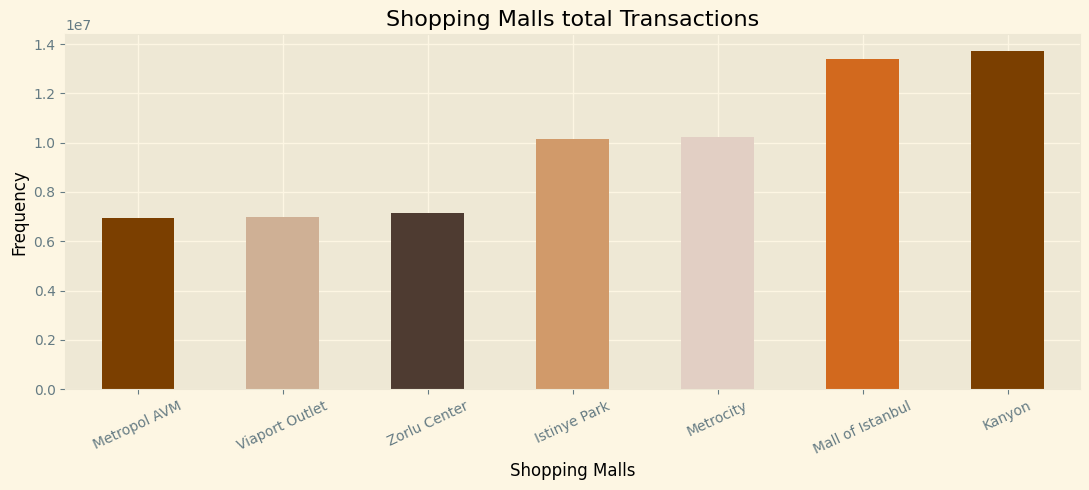

In [104]:
# Shopping Malls Total Transactions
plt.figure(figsize = (11,5))
#colors = ['seagreen','skyblue','red', 'pink','#F96167', 'chocolate','maroon']
colors = ['#7B3F00', '#CFB095', '#4E3B31', '#D19A6A', '#E2CFC4','chocolate']
shopping_malls.plot(kind = 'bar', color = colors)

plt.xticks(rotation = 25)
plt.xlabel('Shopping Malls',  color = 'black')
plt.ylabel('Frequency', color = 'black')
plt.title('Shopping Malls total Transactions', color = 'black')
plt.tight_layout() 

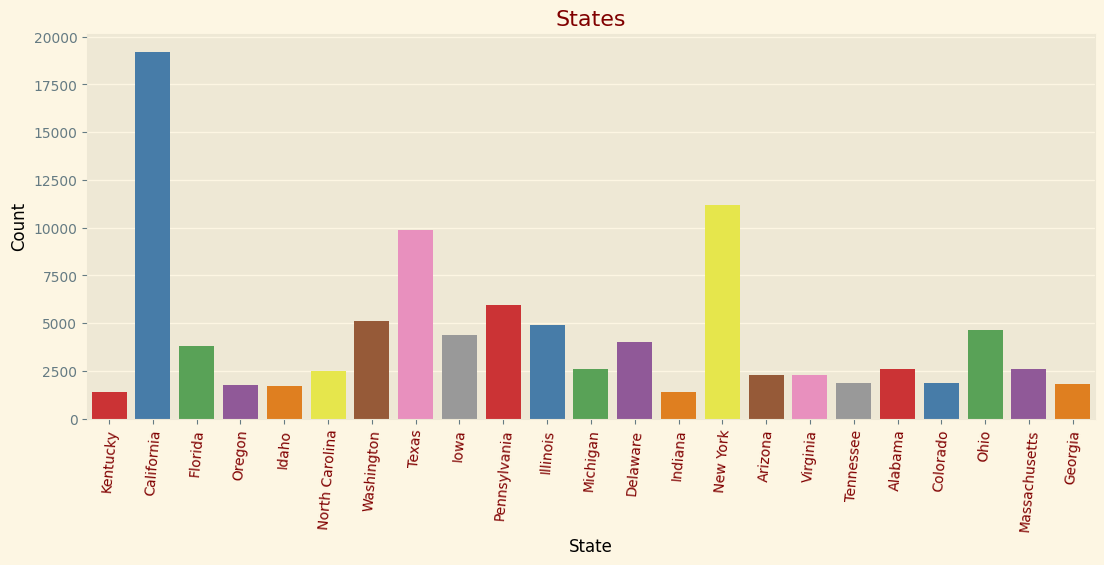

In [118]:
fig, ax = plt.subplots(figsize=(13,5))
sns.countplot(data = data, x ='state', palette = 'Set1', ax= ax)

plt.xlabel('State',color = 'black')
plt.ylabel('Count',color = 'black')
plt.title('States', color = 'maroon')
plt.xticks(rotation=85, color = 'maroon')
plt.show()

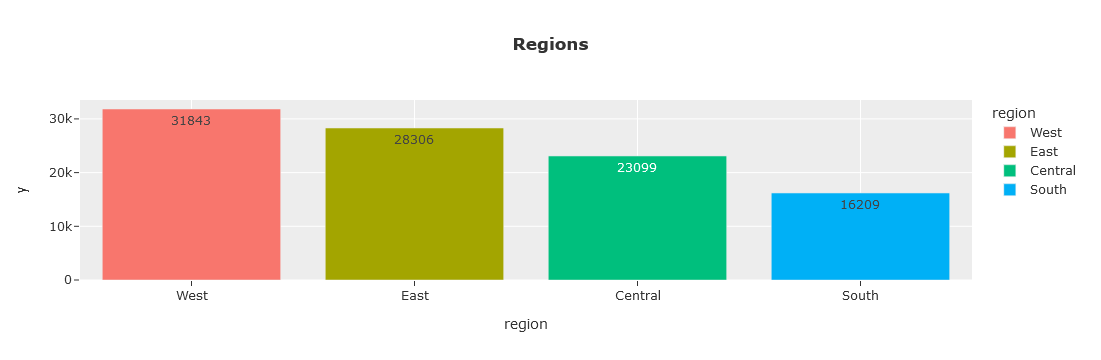

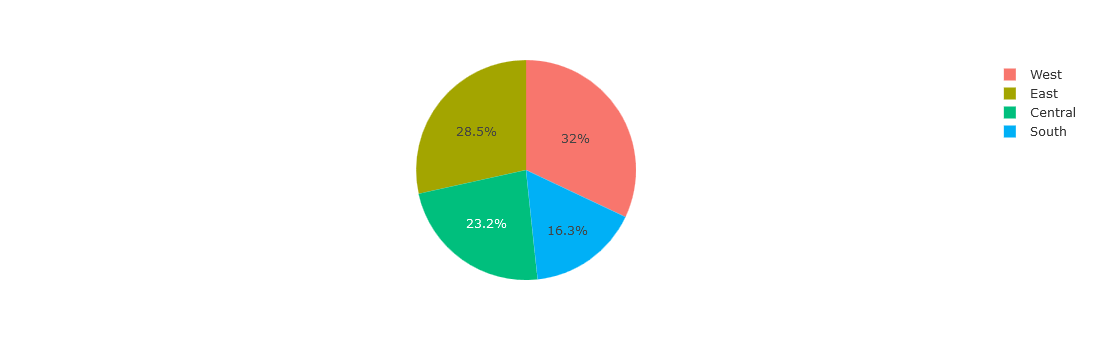

In [128]:
z=data['region'].value_counts()
fig=px.bar(z,x=z.index,y=z.values,color=z.index,text=z.values,
           template='ggplot2',
           title='<b>Regions</b> ')
fig.show()

#Pie Chart
fig=px.pie(z,names=z.index,values=z.values,template='ggplot2')
fig.show()

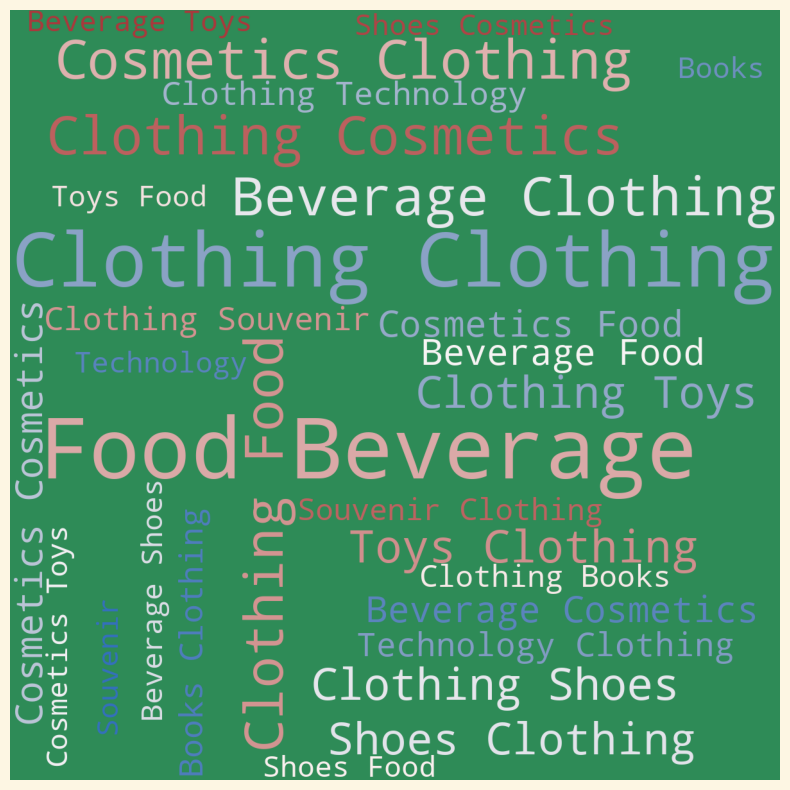

In [138]:
from wordcloud import WordCloud, STOPWORDS

text = ' '.join(data['category'])
plt.rcParams['figure.figsize'] = (10,10)
wordcloud = WordCloud(background_color = 'seagreen',colormap='vlag', width = 1200,  height = 1200, max_words = 121).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
